# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [104]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer


### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [105]:
df = pd.read_csv("nndb_flat.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

<Axes: >

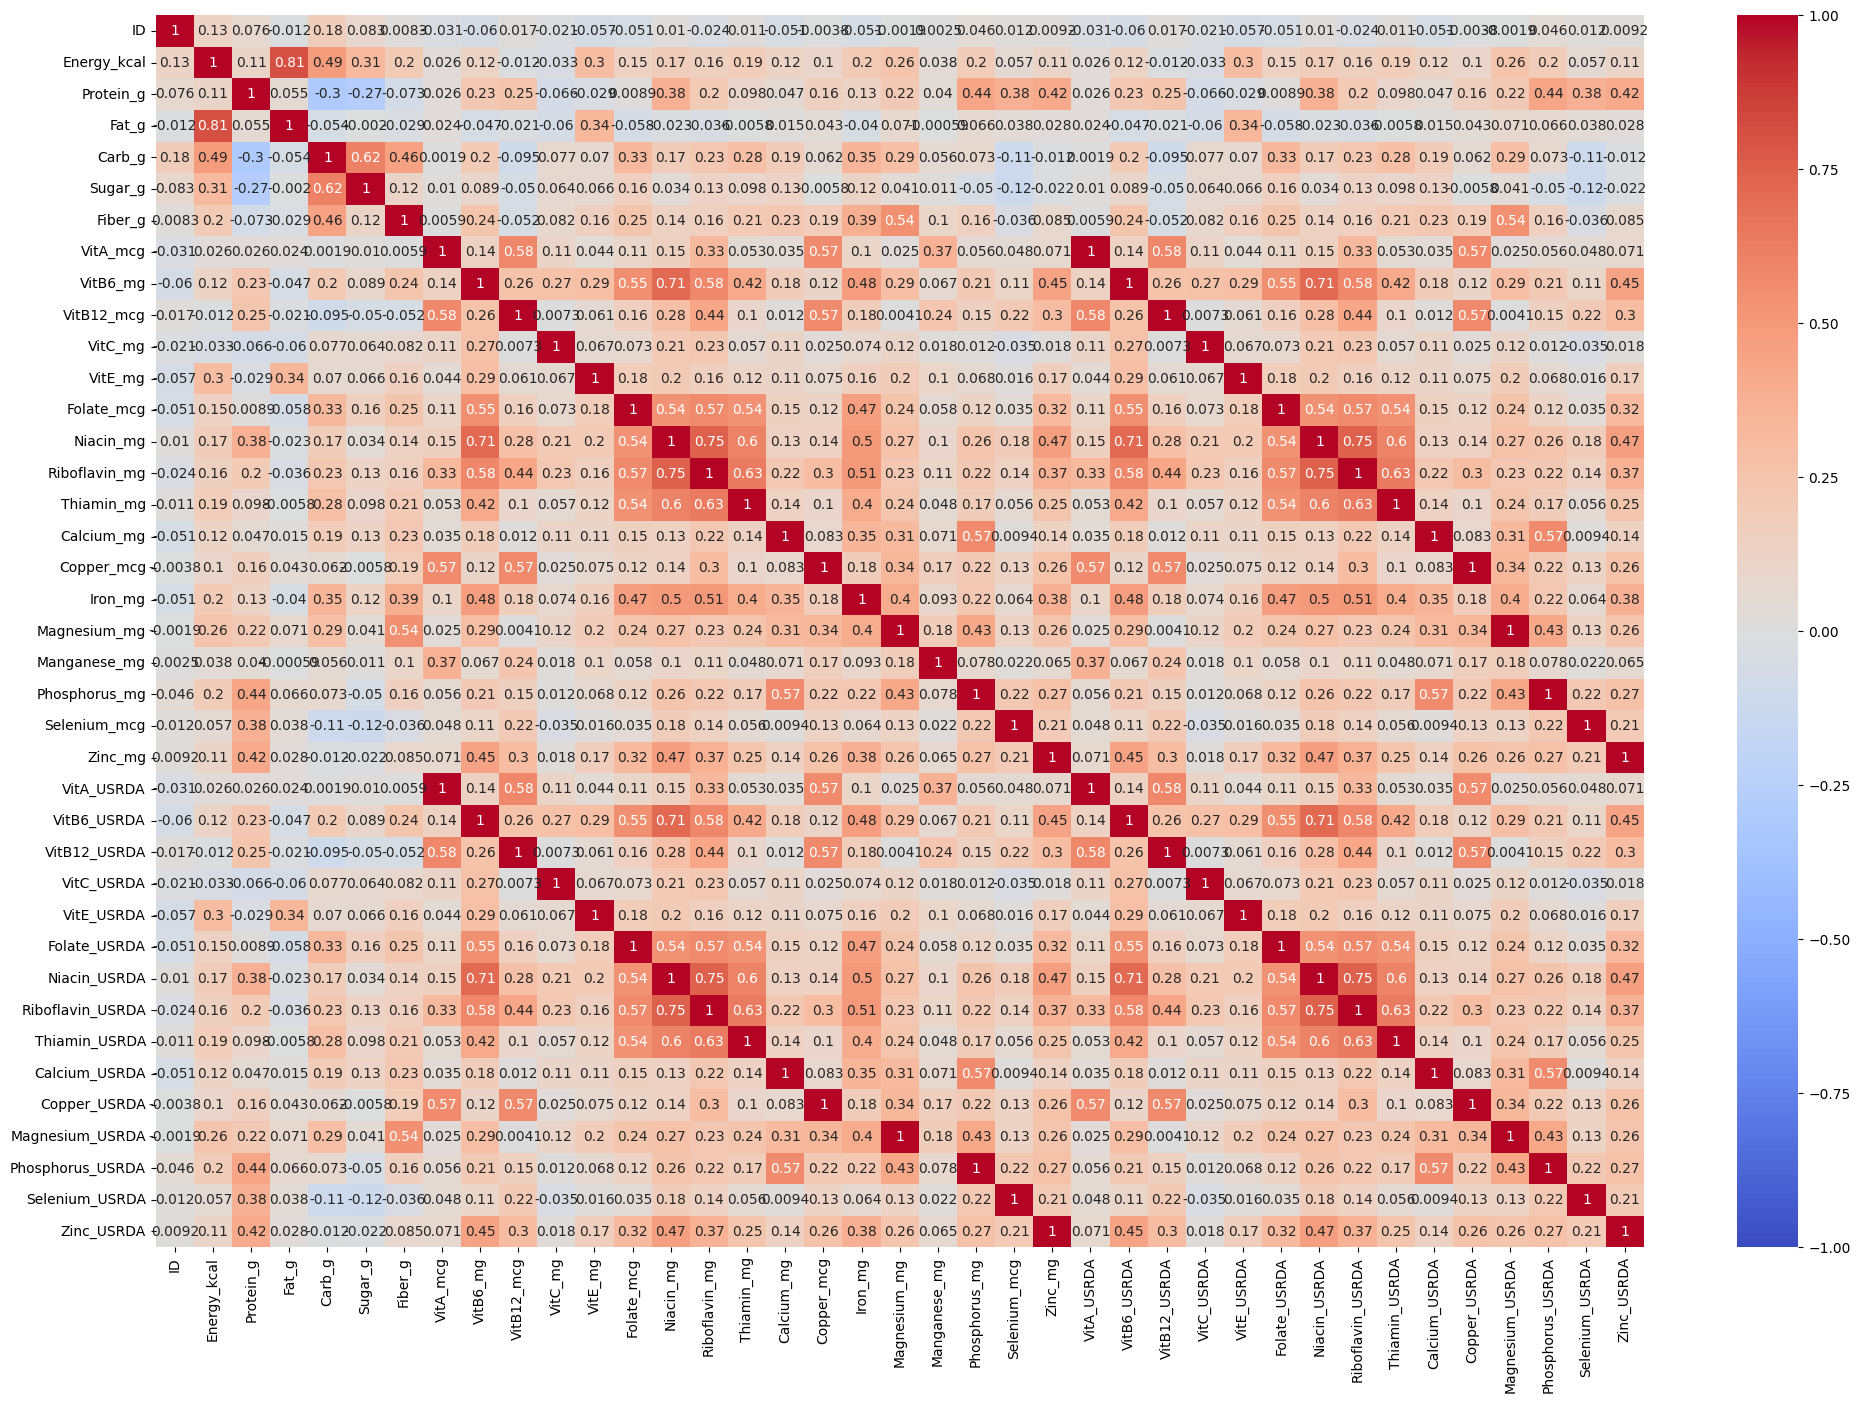

In [106]:
plt.figure(figsize=(24,16))
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1,cmap="coolwarm")

### Variables no numéricas
Elimina las variables de texto del dataset

In [107]:
tipos_comida = df["FoodGroup"]

In [108]:
df.drop(columns=["ScientificName","MfgName","CommonName","Descrip","ShortDescrip","FoodGroup"],inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   Energy_kcal       8618 non-null   float64
 2   Protein_g         8618 non-null   float64
 3   Fat_g             8618 non-null   float64
 4   Carb_g            8618 non-null   float64
 5   Sugar_g           8618 non-null   float64
 6   Fiber_g           8618 non-null   float64
 7   VitA_mcg          8618 non-null   float64
 8   VitB6_mg          8618 non-null   float64
 9   VitB12_mcg        8618 non-null   float64
 10  VitC_mg           8618 non-null   float64
 11  VitE_mg           8618 non-null   float64
 12  Folate_mcg        8618 non-null   float64
 13  Niacin_mg         8618 non-null   float64
 14  Riboflavin_mg     8618 non-null   float64
 15  Thiamin_mg        8618 non-null   float64
 16  Calcium_mg        8618 non-null   float64


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

In [110]:
transformacion_log = FunctionTransformer(func=np.log1p)
X_log = transformacion_log.fit_transform(df)

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [111]:
scaler = StandardScaler()
X_scal = scaler.fit_transform(X_log)

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [112]:
pca = PCA(n_components=len(X_scal[0]))
pca.fit(X_scal)

PCA(n_components=39)

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [113]:
pca.explained_variance_ratio_.cumsum()

array([0.30810438, 0.4425097 , 0.52108952, 0.58434009, 0.63883646,
       0.68242867, 0.723055  , 0.75293413, 0.77992004, 0.80379454,
       0.82455725, 0.84400511, 0.86182718, 0.87675393, 0.89057613,
       0.90372217, 0.91601503, 0.92728576, 0.93723044, 0.94580879,
       0.95335613, 0.96021528, 0.96663173, 0.97234178, 0.97739852,
       0.98163777, 0.98551861, 0.9892054 , 0.99158498, 0.99352336,
       0.99527469, 0.99697152, 0.99850904, 0.99932521, 0.99984632,
       0.99994906, 0.99998529, 0.99999546, 1.        ])

Text(0, 0.5, 'Varianza Explicada Acumulada')

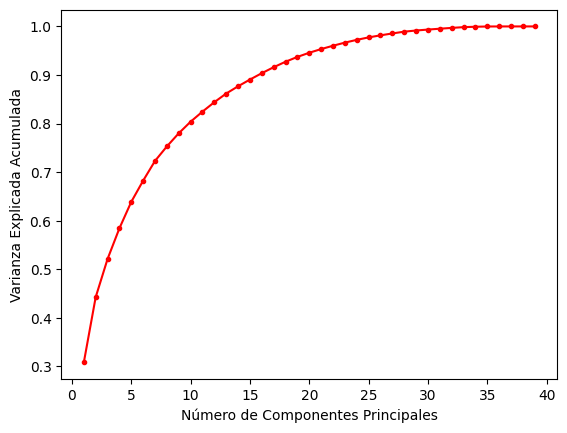

In [114]:
plt.plot( np.arange(1,40),pca.explained_variance_ratio_.cumsum(),marker='.', linestyle='-', color='r')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')

Algo menos de 10 componentes principales

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [115]:
pca2 = PCA(n_components=8)
mod = pca2.fit_transform(X_scal)
df2 = pd.DataFrame(mod,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"])
df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.872949,-0.041708,-1.059564,2.071717,4.316022,-1.091657,1.947041,1.691916
1,-2.856397,0.017080,-1.025593,2.067338,4.304479,-1.034733,1.962871,1.692802
2,-3.783940,0.019644,-1.713222,1.630430,5.214884,-0.210496,1.937739,1.490594
3,1.661086,-0.848726,0.582730,2.815806,1.032576,-3.945505,2.637959,-0.053281
4,1.414139,-0.688807,0.940228,3.345741,1.222156,-4.348554,3.254416,-0.483591
...,...,...,...,...,...,...,...,...
8613,3.219667,-3.762370,-0.083864,1.784162,1.831528,-0.387301,-0.207174,0.490515
8614,-0.004330,-2.525394,1.228694,0.752237,-1.334395,0.112573,-0.442273,0.217634
8615,-3.531264,1.426062,0.254081,-2.154667,-0.279454,1.205619,1.074512,-0.927898
8616,1.397521,-0.447289,2.591885,2.167310,1.272417,0.974047,-2.356329,0.644200


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [121]:
df3 = pd.concat((tipos_comida,df2),axis=1)

In [133]:
for x in range(1,9):
    y = df3.groupby("FoodGroup")[[f"PC{x}"]].mean().sort_values(by=f"PC{x}",ascending=False).head(3)
    print(y)

                            PC1
FoodGroup                      
Breakfast Cereals      6.109026
Nut and Seed Products  3.836293
Spices and Herbs       3.277316
                            PC2
FoodGroup                      
Spices and Herbs       4.524207
Breakfast Cereals      3.075328
Nut and Seed Products  2.522293
                              PC3
FoodGroup                        
Nut and Seed Products    3.743931
Cereal Grains and Pasta  1.912519
Spices and Herbs         1.870691
                                     PC4
FoodGroup                               
Spices and Herbs                2.372647
Dairy and Egg Products          2.003710
Finfish and Shellfish Products  1.615470
                            PC5
FoodGroup                      
Fats and Oils          4.981463
Snacks                 0.826684
Nut and Seed Products  0.698770
                              PC6
FoodGroup                        
Nut and Seed Products    1.598019
Cereal Grains and Pasta  0.732575
Beverages